In [1]:
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import seaborn as sns
import os
from experiment_utils import BCI_experiment
# %matplotlib widget

In [2]:
data_path = '../data/FGG-Tripeptide'

RMSD vs BCI

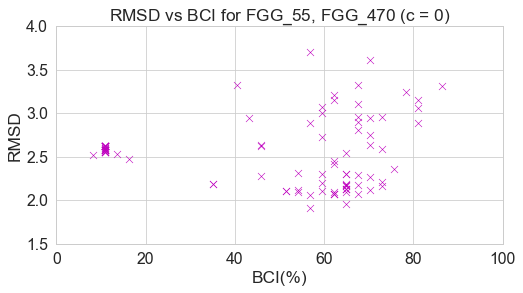

In [ ]:
result = BCI_experiment(data_path, '252_FGG55', '262_FGG470', cst_D=0.)
# Set seaborn style and context
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
sns.set_palette("Set1")
# Create the plot using seaborn
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=result,
    x='BCI',
    y='RMSD',
    marker='x',
    s=50,
    color='m',
    #label=r'FGG$\_$55, FGG$\_$224',
    clip_on=False,
    zorder=10
)
plt.xlim(0, 100)
plt.ylim(1.5, 4)
plt.xlabel('BCI (%)')
plt.ylabel('RMSD')
#plt.xticks(np.linspace(0, 1, 6))
plt.title(r'RMSD vs BCI for FGG$\_$55, FGG$\_$470 (c = 0)')
# Save the figure
plt.savefig('../images/RMSDvsBCI.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'The influence of $\\alpha$ on BCI for FGG$\\_$55, FGG$\\_$470 (c = 0.5)')

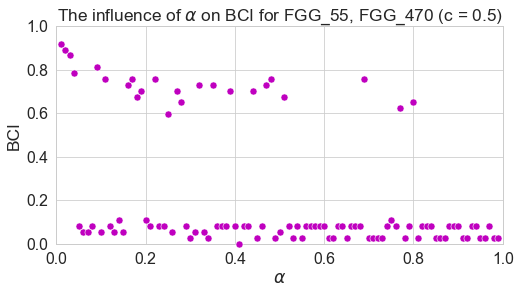

In [4]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
sns.set_palette("Set1")
# Create the plot using seaborn
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=alpha_result,
    x='alpha',
    y='BCI',
    marker='o',
    s=50,
    color='m',
    #label=r'FGG$\_$55, FGG$\_$224',
    clip_on=False,
    zorder=10
)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r'$\alpha$')
plt.ylabel('BCI')
plt.xticks(np.linspace(0, 1, 6))
plt.title(r'The influence of $\alpha$ on BCI for FGG$\_$55, FGG$\_$470 (c = 0.5)')
# Save the figure
#plt.savefig('../images/alpha_FGG_element_name.png', dpi=300, bbox_inches='tight')

In [5]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/262_FGG470.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
i = 0
assignment = alpha_result['assignment'][i]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
print(alpha_result['alpha'][i], otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
print("BCI:", alpha_result['BCI'][i])
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '')

0.01 3.45411345450871
BCI: 0.918918918918919


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/262_FGG470.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
i = 61
assignment = alpha_result['assignment'][i]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
print(alpha_result['alpha'][i], otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
print("BCI:", alpha_result['BCI'][i])
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '')

0.62 2.448032958915575
BCI: 0.02702702702702703


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

ArbAlign alignment

In [1]:
import otmol as otm
from openbabel import pybel
import os
import numpy as np
from experiment_utils import interactive_alignment_plot_py3dmol

data_path = "../Data/FGG-Tripeptide"
molA = next(pybel.readfile("xyz", os.path.join(data_path, '252_FGG55.xyz')))
molB = next(pybel.readfile("xyz", os.path.join('arbalign_output', '253_FGG99-aligned_to-252_FGG55.xyz')))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, np.eye(X_A.shape[0]))
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned))
otm.tl.write_xyz_with_custom_labels(
    os.path.join('arbalign_output', '253_FGG99-aligned_to-252_FGG55_arbalign.xyz'), 
    X_B_aligned, 
    T_B,
    comment="aligned by ArbAlign")
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, np.arange(X_A.shape[0], dtype=int), '252_FGG55', '253_FGG99')
molB2 = next(pybel.readfile("xyz", os.path.join('arbalign_output', '253_FGG99-aligned_to-252_FGG55_arbalign.xyz')))
X_B2, T_B2, B_B2 = otm.tl.process_molecule(molB2)
print(otm.tl.root_mean_square_deviation(X_A, X_B2))
interactive_alignment_plot_py3dmol(X_A, X_B2, T_A, T_B2, B_A, B_B2, np.arange(X_A.shape[0], dtype=int), '252_FGG55', '253_FGG99')

1.8064880455544734


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

1.80648796252735


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [8]:
data_path = "../Data/FGG-Tripeptide"
molA = next(pybel.readfile("xyz", os.path.join(data_path, '252_FGG55.xyz')))
molB = next(pybel.readfile("xyz", os.path.join('arbalign_output', '255_FGG252-aligned_to-252_FGG55.xyz')))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, np.eye(X_A.shape[0]))
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, np.arange(X_A.shape[0], dtype=int))

1.9779105268163695


3Dmol.js failed to load for some reason. Please check your browser console for error messages.